# On main branch, this file should be non executed and no parameters set.
# On dev_ branch, it must be fully executed and must include tests.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import sqlite3

## Parameters

In [3]:
# Set the filename of the database
# Example: 'bubble_filtering__8_neighbors_squared_network.db'

db_filename = 'bubble_filtering__8_neighbors_squared_network.db'

## Main
At the normal uses, the below code should not be changed.

In [4]:
# Read the database with pandas

conn = sqlite3.connect('../results_databases/' + db_filename)

df = pd.read_sql('SELECT * FROM temporal_mean_results', conn,
                 index_col = 'index'
                )
conn.close()

In [5]:
def calc_averages(columnLabel, results_df):
    '''
    Calculate the means for grouped values of columnLabel.
    
    Parameters:
    columnLabel should be in ['mT', 'm2T', 'm4T'].
    results_df contains the temporal averages.
    
    Returns a pandas series of replications and networks averages.
    '''
    
    # Do the mean over the replications
    x = pd.DataFrame(results_df.groupby(['v','N','q','net'])[columnLabel].mean())
    x.reset_index(inplace=True)
    
    # Do the mean over the network configuration
    x = x.groupby(['v','N','q'])[columnLabel].mean()
    
    
    return x

In [6]:
# Calculate the physical interesting quantities

phys_quant = calc_averages('mT', df)
phys_quant = pd.DataFrame(phys_quant)
phys_quant.reset_index(inplace=True)
phys_quant.rename({'mT': 'M'},axis=1,inplace=True)

m2df = calc_averages('m2T', df)
m4df = calc_averages('m4T', df)

phys_quant['M_err'] = np.array(m2df) - phys_quant['M']**2
phys_quant['M_noMod'] = np.array(calc_averages('mT_noMod', df))
phys_quant['M_noMod_err'] = np.array(m2df) - phys_quant['M_noMod']**2

phys_quant['X'] = phys_quant['N']*phys_quant['M_err']
phys_quant['X_noMod'] = phys_quant['N']*phys_quant['M_noMod_err']

phys_quant['u'] = -np.log(1-3*(1 - np.array(m4df)/(3*np.array(m2df)**2))/2)

In [7]:
# Persist the dataframe
phys_quant.to_csv(
    '../results_databases/' + db_filename[:-3] + '__MXU.csv')

<br><br>
## Testing

In [8]:
# The test below is just a check, once I know some plot for the 
# physical quantities I am doing just a visual inspection.

In [9]:
phys_quant.head()

,v,N,q,M,M_err,M_noMod,M_noMod_err,X,X_noMod,u
0,0.25,400,0.0000,0.206236,0.021361,-0.001027,0.063893,8.544282,25.557141,0.257036
1,0.25,400,0.0005,0.201640,0.020491,-0.004404,0.061130,8.196461,24.452135,0.246253
2,0.25,400,0.0010,0.204047,0.020661,0.008375,0.062226,8.264586,24.890545,0.258043
3,0.25,400,0.0015,0.201144,0.020479,-0.001429,0.060936,8.191512,24.374318,0.231578
4,0.25,400,0.0020,0.199880,0.020013,-0.005571,0.059934,8.005042,23.973501,0.248130


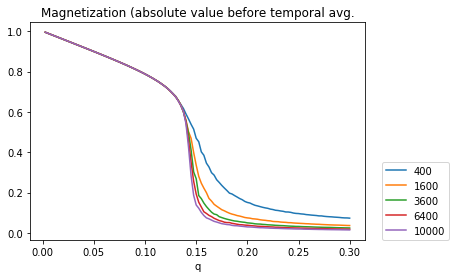

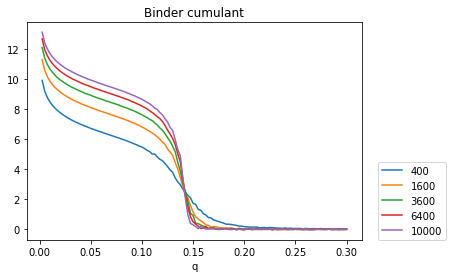

In [10]:
x = phys_quant[phys_quant.v == 1]
N = x.N.unique()
x.set_index(['N','q'], inplace=True)
for n in N:
    x.loc[n].M.plot(label=n)
plt.title('Magnetization (absolute value before temporal avg.')
plt.legend(loc=(1.05,0))
plt.show()

for n in N:
    x.loc[n].u.plot(label=n)
plt.title('Binder cumulant')
plt.legend(loc=(1.05,0))
plt.show()

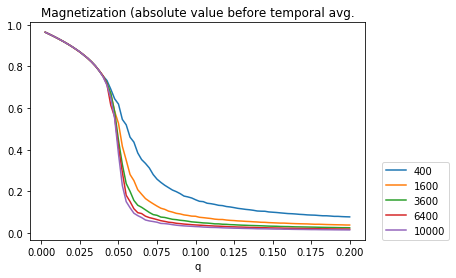

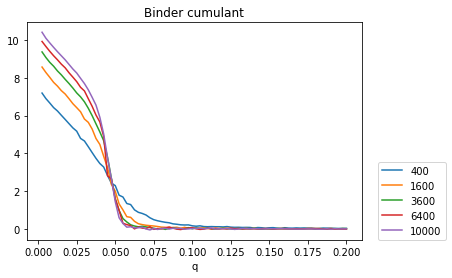

In [11]:
x = phys_quant[phys_quant.v == 0.4]
N = x.N.unique()
x.set_index(['N','q'], inplace=True)
for n in N:
    x.loc[n].M.plot(label=n)
plt.title('Magnetization (absolute value before temporal avg.')
plt.legend(loc=(1.05,0))
plt.show()

for n in N:
    x.loc[n].u.plot(label=n)
plt.title('Binder cumulant')
plt.legend(loc=(1.05,0))
plt.show()

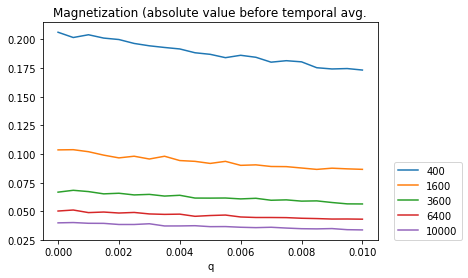

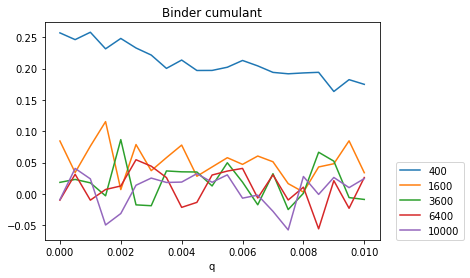

In [12]:
x = phys_quant[phys_quant.v == 0.25]
N = x.N.unique()
x.set_index(['N','q'], inplace=True)
for n in N:
    x.loc[n].M.plot(label=n)
plt.title('Magnetization (absolute value before temporal avg.')
plt.legend(loc=(1.05,0))
plt.show()

for n in N:
    x.loc[n].u.plot(label=n)
plt.title('Binder cumulant')
plt.legend(loc=(1.05,0))
plt.show()